<a href="https://colab.research.google.com/github/a-apte/DS_Visualization_Project/blob/master/Bitcoin_Valuation_Thoughts_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
from google.colab import files
uploaded = files.upload()

Saving RiseAndFallBitcoin.png to RiseAndFallBitcoin.png


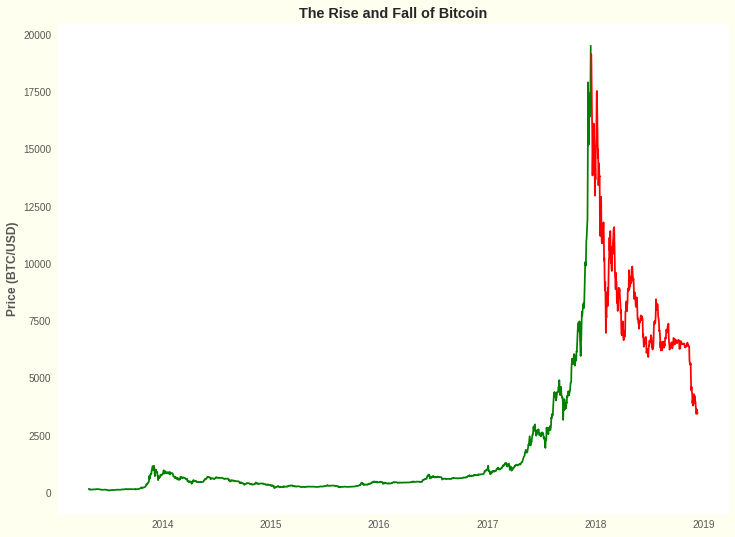

In [87]:
from IPython.display import Image
Image(filename = 'RiseAndFallBitcoin.png', width = 1100)

## DATA ANALYSIS

#### IMPORT PACKAGES

In [0]:
!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

    100% |████████████████████████████████| 215kB 25.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
%matplotlib inline
import seaborn as sns


#### IMPORT RAW CSV FILES FROM GITHUB

In [2]:
#importing Raw csv from Github


urlB = 'https://raw.githubusercontent.com/a-apte/DS_Visualization_Project/master/data/bitcoin.csv'
urlR = 'https://raw.githubusercontent.com/a-apte/DS_Visualization_Project/master/data/ripple.csv'
urlE = 'https://raw.githubusercontent.com/a-apte/DS_Visualization_Project/master/data/ethereum.csv'


dfB = pd.read_csv(urlB)
dfB.Date = pd.to_datetime(dfB.Date)
dfB.set_index('Date', inplace = True)

dfR = pd.read_csv(urlR)
dfR.Date = pd.to_datetime(dfR.Date)
dfR.set_index('Date', inplace = True)

dfE = pd.read_csv(urlE)
dfE.Date = pd.to_datetime(dfE.Date)
dfE.set_index('Date', inplace = True)


dfB.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day
Date,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1.488567e+09,Sunday,2013,4,28
2013-04-29,134.44,147.49,134.00,144.54,0,1.603769e+09,Monday,2013,4,29
2013-04-30,144.00,146.93,134.05,139.00,0,1.542813e+09,Tuesday,2013,4,30
2013-05-01,139.00,139.89,107.72,116.99,0,1.298955e+09,Wednesday,2013,5,1
2013-05-02,116.38,125.60,92.28,105.21,0,1.168517e+09,Thursday,2013,5,2


In [3]:
dfB.dtypes

Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market_Cap    float64
DayOfWeek      object
Year            int64
Month           int64
Day             int64
dtype: object

In [4]:
dfR.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day
Date,,,,,,,,,,
2013-08-04,0.005874,0.005927,0.005874,0.005882,0,45983577.0,Sunday,2013,8,4
2013-08-05,0.005875,0.005980,0.005613,0.005613,0,43879157.0,Monday,2013,8,5
2013-08-06,0.005637,0.005661,0.004629,0.004680,0,36591008.0,Tuesday,2013,8,6
2013-08-07,0.004669,0.004682,0.004333,0.004417,0,34534121.0,Wednesday,2013,8,7
2013-08-08,0.004397,0.004424,0.004175,0.004254,0,33258632.0,Thursday,2013,8,8


In [5]:
dfE.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day
Date,,,,,,,,,,
2015-08-07,2.830000,3.540000,2.520000,2.770000,164329,166610555.0,Friday,2015,8,7
2015-08-08,2.790000,2.800000,0.714725,0.753325,674188,45486894.0,Saturday,2015,8,8
2015-08-09,0.706136,0.879810,0.629191,0.701897,532170,42399573.0,Sunday,2015,8,9
2015-08-10,0.713989,0.729854,0.636546,0.708448,405283,42818364.0,Monday,2015,8,10
2015-08-11,0.708087,1.130000,0.663235,1.070000,1463100,64569288.0,Tuesday,2015,8,11


In [6]:
print(len(dfB))
print(len(dfR))
print(len(dfE))


2054
1956
1223


##### Drawing Main Graphic

In [7]:
dfB2 = dfB.reset_index()
dfB2.loc[dfB2.High.idxmax()]

Date          2017-12-17 00:00:00
Open                      19475.8
High                        20089
Low                       18974.1
Close                     19140.8
Volume                13314599936
Market_Cap            3.20577e+11
DayOfWeek                  Sunday
Year                         2017
Month                          12
Day                            17
Name: 1694, dtype: object

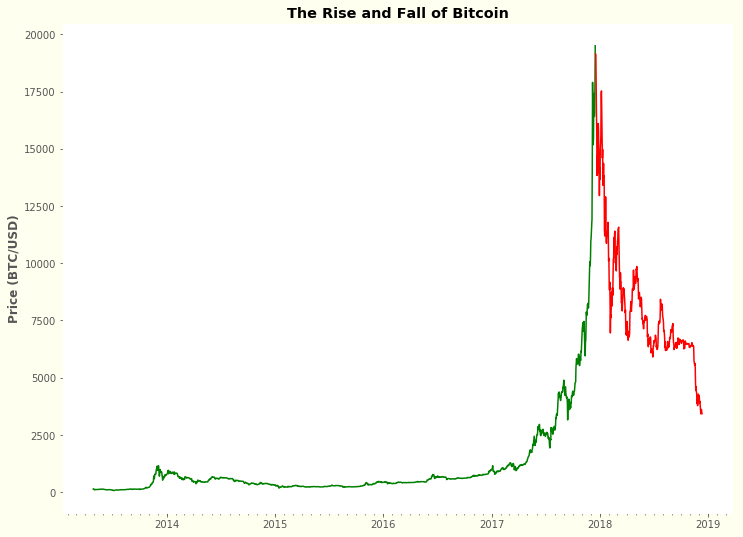

In [8]:
# Rise and Fall of Bitcoin Graph


years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12 # width
fig_size[1] = 9  #height

style.use("ggplot") 

fig, ax = plt.subplots()

plt.title('The Rise and Fall of Bitcoin', fontweight='bold')

frame1 = plt.gca()

fig.set_facecolor("ivory")
ax.set_facecolor("white")

x1 = dfB2.Date[:1694]
x2 = dfB2.Date[1694:]
y1 = dfB2.Close[:1694]
y2 = dfB2.Close[1694:]

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

ax.plot(x1,y1, color = 'g')
ax.plot(x2,y2, color = 'r')

plt.ylabel('Price (BTC/USD)', fontweight='bold')

# frame1.axes.get_xaxis().set_visible(False)

plt.show()

### Supply Story: Circulation of Bitcoin Plot

In [9]:
dfB['Circulation'] = dfB['Market_Cap'] / dfB['Close']

dfB.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day,Circulation
Date,,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1.488567e+09,Sunday,2013,4,28,1.109132e+07
2013-04-29,134.44,147.49,134.00,144.54,0,1.603769e+09,Monday,2013,4,29,1.109568e+07
2013-04-30,144.00,146.93,134.05,139.00,0,1.542813e+09,Tuesday,2013,4,30,1.109938e+07
2013-05-01,139.00,139.89,107.72,116.99,0,1.298955e+09,Wednesday,2013,5,1,1.110313e+07
2013-05-02,116.38,125.60,92.28,105.21,0,1.168517e+09,Thursday,2013,5,2,1.110652e+07


In [0]:
dfB_YM = dfB.groupby(['Year','Month'])

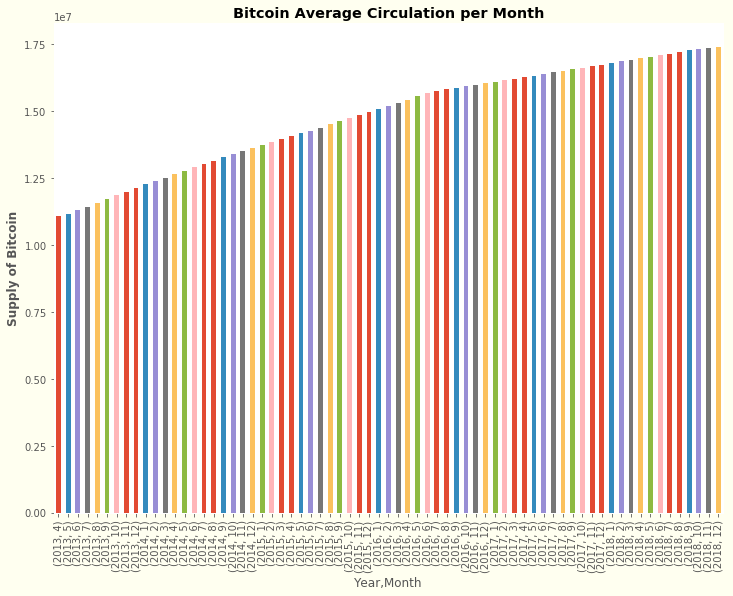

In [11]:
# dfB_YM['Circulation'].mean().plot.bar(); # Money Supply Story


style.use("ggplot") 

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')


fig, ax = plt.subplots()

plt.title('Bitcoin Average Circulation per Month', fontweight='bold')

frame1 = plt.gca()

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12 # width
fig_size[1] = 9  #height


fig.set_facecolor("ivory")
ax.set_facecolor("white")


# # format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

dfB_YM['Circulation'].mean().plot.bar()


plt.ylabel('Supply of Bitcoin', fontweight='bold')

plt.xticks(rotation=90)

# frame1.axes.get_xaxis().set_visible(False)

plt.show()

**The market cap of bitcoin equals the price of bitcoin times its supply in circulation. The supply in bitcoin is increasing at a decreasing rate as the graph demonstrates. While increasing supply does decrease the market cap, it doesn't explain the dramatic decrease in btcoin price in 2018, **

### Relative valuation with other cryptocurrencies

##### The properties of Bitcoin Prices

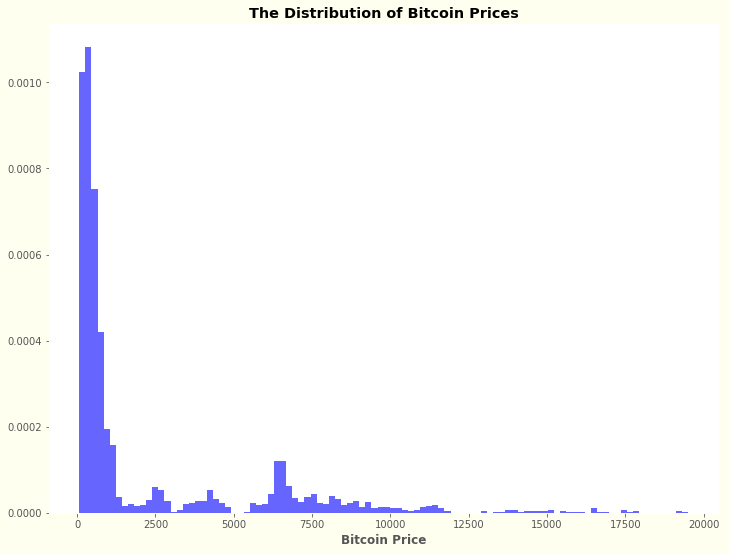

In [15]:
data = dfB.Close
fig, ax = plt.subplots()
plt.title('The Distribution of Bitcoin Prices', fontweight='bold')
# frame1 = plt.gca()

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12 # width
fig_size[1] = 9  #height

fig.set_facecolor("ivory")
ax.set_facecolor("white")

plt.xlabel('Bitcoin Price', fontweight='bold')

plt.hist(data, bins=100, density=True, alpha=0.6, color='b')

plt.show()

**The distribution of stock prices has a long right tail. To analyze these prices, one must analyze the daily returns which one suspects will be more normally distributed.**

In [11]:
returns = pd.DataFrame()

returns['bitcoin'] = dfB['Close'].pct_change()
returns['ripple'] = dfR['Close'].pct_change()
returns['ethereum'] = dfE['Close'].pct_change()

returns.fillna(0, inplace=True)

print (len(returns))

returns.head()



2054


,bitcoin,ripple,ethereum
Date,,,
2013-04-28,0.000000,0.0,0.0
2013-04-29,0.076969,0.0,0.0
2013-04-30,-0.038328,0.0,0.0
2013-05-01,-0.158345,0.0,0.0
2013-05-02,-0.100692,0.0,0.0


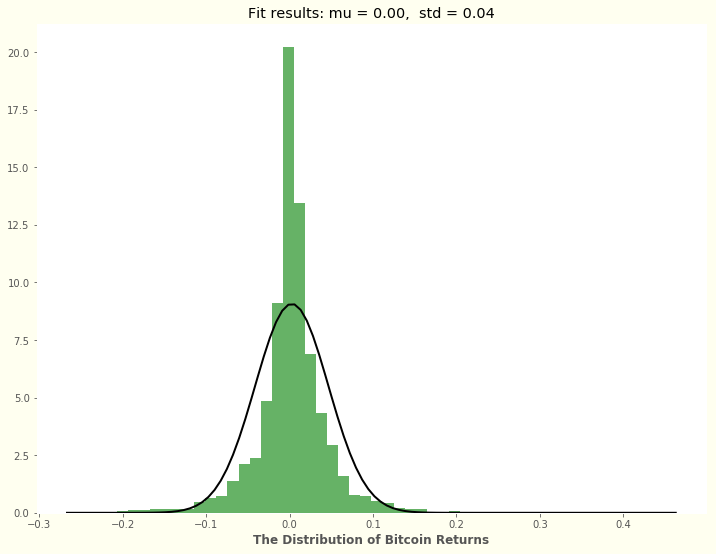

In [33]:
from scipy import stats

data = returns.bitcoin

fig, ax = plt.subplots()

# plt.title('The Distribution of Bitcoin Returns', fontweight='bold')

# frame1 = plt.gca()

fig_size = plt.rcParams["figure.figsize"]

fig_size[0] = 12 # width
fig_size[1] = 9  #height

fig.set_facecolor("ivory")
ax.set_facecolor("white")


# Fit a normal distribution to the data:
mu, std = stats.norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)


plt.xlabel('The Distribution of Bitcoin Returns', fontweight='bold')


plt.show()

**The returns of bitcoin seem to follow a normal distribution except for the skinny peak and fat tails. A test of normality will determine if it's a normal distribution.**

In [18]:
# Test for normality

normal_bitcoin_test = stats.normaltest(returns.bitcoin, nan_policy='omit')

print(normal_bitcoin_test)

alpha = 1e-3
print("\n")

if normal_bitcoin_test[1] < alpha:
  # null hypothesis: x comes from a normal distribution
  print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

NormaltestResult(statistic=443.6461152348926, pvalue=4.607550647827237e-97)


The null hypothesis can be rejected


##### Scatterplots of the Returns of each cryptocurrency

In [19]:
returns2 = returns.reset_index()

returns2.Date = pd.to_datetime(returns2.Date)

returns2.dtypes

Date        datetime64[ns]
bitcoin            float64
ripple             float64
ethereum           float64
dtype: object

In [20]:
returns2['Year'] = returns2['Date'].dt.year

returns2.head()

,Date,bitcoin,ripple,ethereum,Year
0,2013-04-28,0.000000,0.0,0.0,2013
1,2013-04-29,0.076969,0.0,0.0,2013
2,2013-04-30,-0.038328,0.0,0.0,2013
3,2013-05-01,-0.158345,0.0,0.0,2013
4,2013-05-02,-0.100692,0.0,0.0,2013


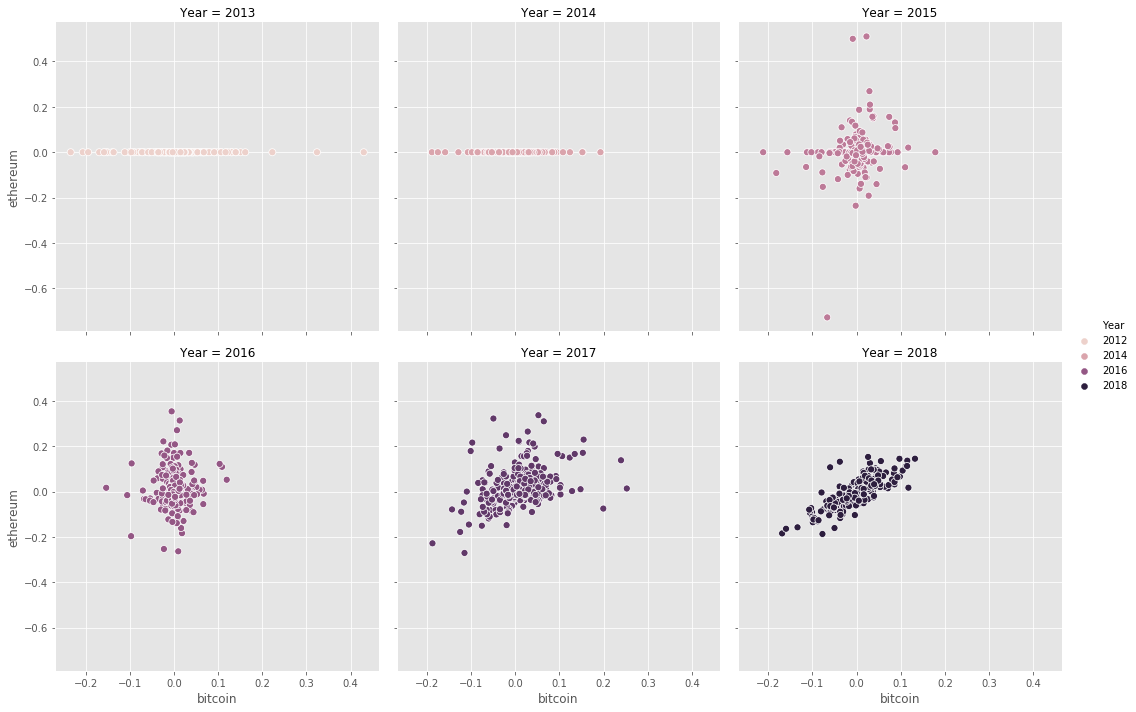

In [21]:
sns.relplot('bitcoin', 'ethereum', data = returns2, col = 'Year', hue = 'Year', col_wrap = 3, s = 50)

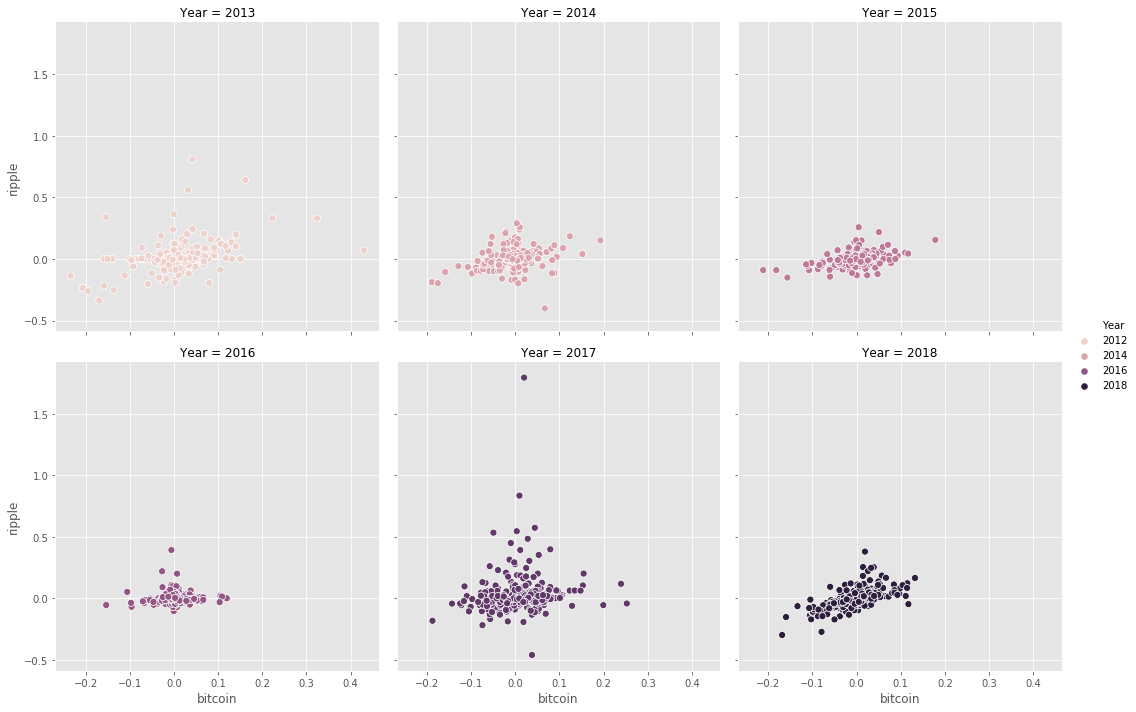

In [22]:
sns.relplot('bitcoin', 'ripple', data = returns2, col = 'Year', hue = 'Year', col_wrap = 3, s = 50)

**In both cases, it appears that the relationship between bitcoin and the other two cryptocurrencies becomes stronger.**

##### Correlations through time

In [23]:
returns2[returns2.Year == 2015].corr()

,bitcoin,ripple,ethereum,Year
bitcoin,1.000000,0.378870,0.159696,NaN
ripple,0.378870,1.000000,-0.009642,NaN
ethereum,0.159696,-0.009642,1.000000,NaN
Year,NaN,NaN,NaN,NaN


In [24]:
returns2[returns2.Year == 2016].corr()

,bitcoin,ripple,ethereum,Year
bitcoin,1.000000,0.064875,0.032630,NaN
ripple,0.064875,1.000000,0.054031,NaN
ethereum,0.032630,0.054031,1.000000,NaN
Year,NaN,NaN,NaN,NaN


In [25]:
returns2[returns2.Year == 2017].corr()

,bitcoin,ripple,ethereum,Year
bitcoin,1.000000,0.106075,0.355157,NaN
ripple,0.106075,1.000000,0.110389,NaN
ethereum,0.355157,0.110389,1.000000,NaN
Year,NaN,NaN,NaN,NaN


In [26]:
returns2[returns2.Year == 2018].corr()

,bitcoin,ripple,ethereum,Year
bitcoin,1.000000,0.652993,0.809761,NaN
ripple,0.652993,1.000000,0.732890,NaN
ethereum,0.809761,0.732890,1.000000,NaN
Year,NaN,NaN,NaN,NaN


**One can see that with actual price returns instead of using data with filled 0, the correlation becomes stronger, especially in the most recent periods. This suggests that one can value bitcoin using a relative valuation with another cryptocurrency**

#### Price Multiple Estimation

In [27]:
price_mult = pd.DataFrame()

price_mult['bitcoin'] = dfB['Close'] 
price_mult['ripple'] = dfR['Close'] 
price_mult['ethereum'] = dfE['Close'] 

price_mult2 = price_mult.reset_index()

price_mult2.head()

,Date,bitcoin,ripple,ethereum
0,2013-04-28,134.21,NaN,NaN
1,2013-04-29,144.54,NaN,NaN
2,2013-04-30,139.00,NaN,NaN
3,2013-05-01,116.99,NaN,NaN
4,2013-05-02,105.21,NaN,NaN


In [28]:
price_mult2['BR'] = price_mult2.bitcoin / price_mult2.ripple
price_mult2['BE'] = price_mult2.bitcoin / price_mult2.ethereum
price_mult2['Year'] = price_mult2.Date.dt.year

price_mult2.head()

,Date,bitcoin,ripple,ethereum,BR,BE,Year
0,2013-04-28,134.21,NaN,NaN,NaN,NaN,2013
1,2013-04-29,144.54,NaN,NaN,NaN,NaN,2013
2,2013-04-30,139.00,NaN,NaN,NaN,NaN,2013
3,2013-05-01,116.99,NaN,NaN,NaN,NaN,2013
4,2013-05-02,105.21,NaN,NaN,NaN,NaN,2013


In [29]:
price_mult2.groupby('Year').describe().T

Year                    2013           2014          2015           2016  \
BE       count      0.000000       0.000000    147.000000     366.000000   
         mean            NaN            NaN    351.008099      82.021956   
         std             NaN            NaN    118.538825      83.250098   
         min             NaN            NaN    100.931408      28.595994   
         25%             NaN            NaN    249.812061      46.138534   
         50%             NaN            NaN    362.495146      53.232397   
         75%             NaN            NaN    451.806944      75.780446   
         max             NaN            NaN    619.691879     486.250073   
BR       count    150.000000     365.000000    365.000000     366.000000   
         mean   26580.714850   77433.314080  36824.659679   83956.341884   
         std    13584.717514   42331.264333  19429.500915   22861.840328   
         min     9184.402032   11145.311382  12513.173611   45169.105301   
         25%    19537.104519   41573.588206  26280.894468   67200.670486   
         50%    23779.034830   73743.402355  30095.367847   83627.328806   
         75%    31008.375453  100891.069676  42764.492754  100254.858566   
         max    81426.821800  226266.903915  89816.710307  158094.929532   
bitcoin  count    248.000000     365.000000    365.000000     366.000000   
         mean     257.474395     527.236548    272.453397     568.492213   
         std      274.293122     148.637754     59.337780     139.255688   
         min       68.430000     310.740000    178.100000     364.330000   
         25%      108.225000     394.770000    234.180000     432.205000   
         50%      127.075000     502.500000    249.010000     582.555000   
         75%      204.837500     622.210000    285.300000     664.227500   
         max     1151.170000     953.290000    465.320000     975.920000   
ethereum count      0.000000       0.000000    147.000000     366.000000   
         mean            NaN            NaN      0.942803       9.778108   
         std             NaN            NaN      0.298068       3.665623   
         min             NaN            NaN      0.434829       0.937124   
         25%             NaN            NaN      0.801716       8.137500   
         50%             NaN            NaN      0.903885      10.895000   
         75%             NaN            NaN      1.020000      12.035000   
         max             NaN            NaN      2.770000      20.590000   
ripple   count    150.000000     365.000000    365.000000     366.000000   
         mean       0.013567       0.009563      0.008864       0.006894   
         std        0.011966       0.006691      0.003731       0.000966   
         min        0.003092       0.002810      0.004090       0.005112   
         25%        0.006176       0.004837      0.006588       0.006062   
         50%        0.008810       0.005643      0.008019       0.006675   
         75%        0.014383       0.014279      0.010309       0.007873   
         max        0.058692       0.028726      0.024390       0.009454   

Year                     2017          2018  
BE       count     365.000000    345.000000  
         mean       30.391971     19.550371  
         std        27.632692      8.474278  
         min         6.624399      8.845128  
         25%        13.189133     12.843633  
         50%        19.447778     15.997757  
         75%        25.931519     29.097012  
         max       122.194614     38.500169  
BR       count     365.000000    345.000000  
         mean    55507.404212  13178.040509  
         std     61662.567349   3870.995644  
         min      4666.177829   4874.750000  
         25%     14963.753684  11079.336810  
         50%     25751.472580  12319.607862  
         75%     65718.988597  14178.742394  
         max    226053.994083  23970.270373  
bitcoin  count     365.000000    345.000000  
         mean     4006.033616   7795.841072  
         

**Bitcoin-Ripple Price Ratio**

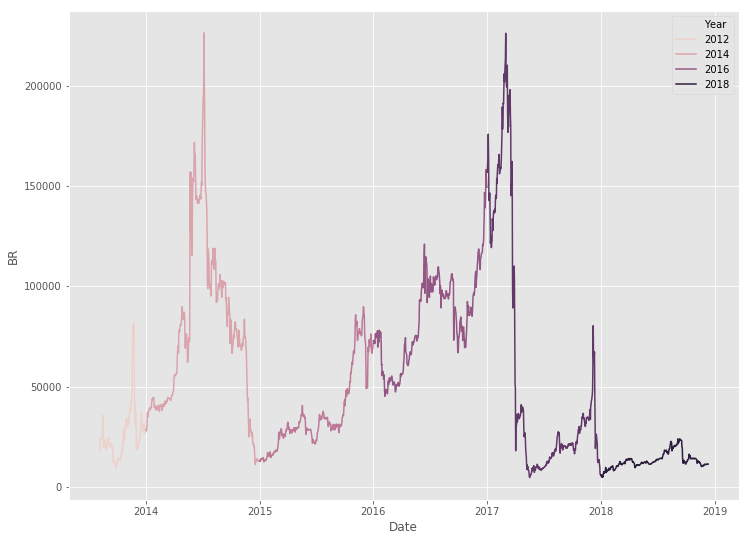

In [30]:
sns.lineplot('Date','BR', data = price_mult2, hue = 'Year')

**Bitcoin-Ethereum Price Ratio**

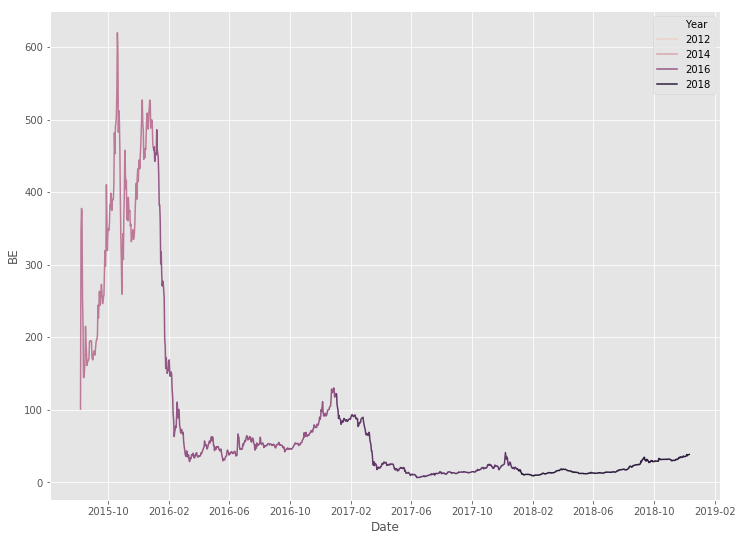

In [31]:
sns.lineplot('Date','BE', data = price_mult2, hue = 'Year')

### Intrinsic Valuation

# EXTRA STUFF (AKA JUNK)

In [38]:
url2 = 'https://raw.githubusercontent.com/a-apte/DS_Visualization_Project/master/data/WGC-GOLD_DAILY_USD.csv'

gold_df = pd.read_csv(url2)

gold_df.set_index('Date', inplace = True)

gold_df = gold_df.sort_index(ascending=True)

gold_df.head()

,Value
Date,
1/1/2014,1204.50
1/1/2015,1206.00
1/1/2016,1060.00
1/1/2018,1291.00
1/10/2014,1244.25


In [36]:
merged_gold = pd.merge(dfB, gold_df, how='outer', left_index=True, right_index=True)

merged_gold.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day,Circulation,Value
Date,,,,,,,,,,,,
2013-04-28 00:00:00,135.30,135.98,132.10,134.21,0.0,1.488567e+09,Sunday,2013.0,4.0,28.0,1.109132e+07,NaN
2013-04-29 00:00:00,134.44,147.49,134.00,144.54,0.0,1.603769e+09,Monday,2013.0,4.0,29.0,1.109568e+07,NaN
2013-04-30 00:00:00,144.00,146.93,134.05,139.00,0.0,1.542813e+09,Tuesday,2013.0,4.0,30.0,1.109938e+07,NaN
2013-05-01 00:00:00,139.00,139.89,107.72,116.99,0.0,1.298955e+09,Wednesday,2013.0,5.0,1.0,1.110313e+07,NaN
2013-05-02 00:00:00,116.38,125.60,92.28,105.21,0.0,1.168517e+09,Thursday,2013.0,5.0,2.0,1.110652e+07,NaN


In [0]:
dfs['NVT'] = 0

dfs['NVT'] = 1.0* dfs['Market Cap'] / dfs['Volume']

dfs.dtypes

In [0]:
dfs['NVT'].loc[dfs['Volume']==0] = 0.0

In [0]:
dfs.describe()

In [0]:
dfs['NVT'].plot()

In [0]:
dfs['Circulating Supply'] = dfs['Market Cap'] / dfs['Close**']

dfs['Circulating Supply'].plot()
                                                    
                                                    

In [0]:
'''
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

#if necessary convert to datetime
df.date = pd.to_datetime(df.date)

df = df[['date', 'open', 'high', 'low', 'close', 'volume']]
df["date"] = df["date"].apply(mdates.date2num)

f1 = plt.subplot2grid((6, 4), (1, 0), rowspan=6, colspan=4, axisbg='#07000d')
candlestick_ohlc(f1, df.values, width=.6, colorup='#53c156', colordown='#ff1717')
f1.xaxis_date()
f1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d %H:%M:%S'))

plt.xticks(rotation=45)
plt.ylabel('Stock Price')
plt.xlabel('Date Hours:Minutes')
plt.show()


'''

In [0]:
'''


You can use matplotlib to plot the histogram and the PDF (as in the link in @MrE's answer). For fitting and for computing the PDF, you can use scipy.stats.norm, as follows.

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = norm.rvs(10.0, 2.5, size=500)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()





'''

##### Normality Tests of Returns of Bitcoin

In [0]:
from scipy import stats


'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html'

'https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html'

In [0]:
normal_bitcoin_test = stats.normaltest(returns.bitcoin, nan_policy='omit')

print(normal_bitcoin_test)

alpha = 1e-3

if normal_bitcoin_test[1] < alpha:
  # null hypothesis: x comes from a normal distribution
  print("The null hypothesis can be rejected")
else:
  print("The null hypothesis cannot be rejected")

NormaltestResult(statistic=443.6461152348926, pvalue=4.607550647827237e-97)
The null hypothesis can be rejected


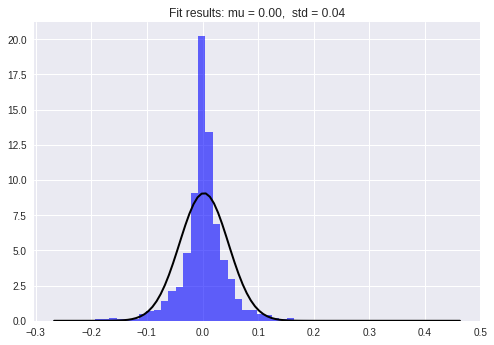

In [0]:
data = returns.bitcoin

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=50, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


In [0]:


url_bit = 'https://raw.githubusercontent.com/a-apte/DS_Visualization_Project/master/data/total-bitcoins.csv'

df_circ = pd.read_csv(url_bit, header = None, names = ['Date', 'Circulation'])


print(len(df_circ))

df_circ.head()

1027


,Date,Circulation
0,4/28/2013 0:00,11090225.0
1,4/30/2013 0:00,11098475.0
2,5/2/2013 0:00,11105600.0
3,5/4/2013 0:00,11113125.0
4,5/6/2013 0:00,11121050.0


In [0]:
df_circ.Date = pd.to_datetime(df_circ.Date)

In [0]:
df_circ.set_index('Date', inplace=True)

df_circ.head()

,Circulation
Date,
2013-04-28,11090225.0
2013-04-30,11098475.0
2013-05-02,11105600.0
2013-05-04,11113125.0
2013-05-06,11121050.0


In [0]:
dfB2 = dfB

dfB2.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day
Date,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1.488567e+09,Sunday,2013,4,28
2013-04-29,134.44,147.49,134.00,144.54,0,1.603769e+09,Monday,2013,4,29
2013-04-30,144.00,146.93,134.05,139.00,0,1.542813e+09,Tuesday,2013,4,30
2013-05-01,139.00,139.89,107.72,116.99,0,1.298955e+09,Wednesday,2013,5,1
2013-05-02,116.38,125.60,92.28,105.21,0,1.168517e+09,Thursday,2013,5,2


In [0]:
merged = pd.merge(dfB2, df_circ, how='inner', left_index=True, right_index=True)

merged.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day,Circulation
Date,,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1.488567e+09,Sunday,2013,4,28,11090225.0
2013-04-30,144.00,146.93,134.05,139.00,0,1.542813e+09,Tuesday,2013,4,30,11098475.0
2013-05-02,116.38,125.60,92.28,105.21,0,1.168517e+09,Thursday,2013,5,2,11105600.0
2013-05-04,98.10,115.00,92.50,112.50,0,1.250317e+09,Saturday,2013,5,4,11113125.0
2013-05-06,115.98,124.66,106.64,112.30,0,1.249023e+09,Monday,2013,5,6,11121050.0


In [0]:
merged['implied_price'] = merged['Market_Cap'] / merged['Circulation']

merged.head()

,Open,High,Low,Close,Volume,Market_Cap,DayOfWeek,Year,Month,Day,Circulation,implied_price
Date,,,,,,,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,0,1.488567e+09,Sunday,2013,4,28,11090225.0,134.223312
2013-04-30,144.00,146.93,134.05,139.00,0,1.542813e+09,Tuesday,2013,4,30,11098475.0,139.011272
2013-05-02,116.38,125.60,92.28,105.21,0,1.168517e+09,Thursday,2013,5,2,11105600.0,105.218763
2013-05-04,98.10,115.00,92.50,112.50,0,1.250317e+09,Saturday,2013,5,4,11113125.0,112.508099
2013-05-06,115.98,124.66,106.64,112.30,0,1.249023e+09,Monday,2013,5,6,11121050.0,112.311613


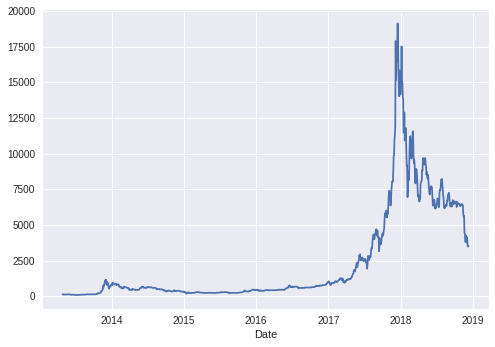

In [0]:
plot_price = merged[['Close', 'implied_price']]

plot_price.Close.plot()

In [0]:
'''
style.use("fivethirtyeight") 

fig, ax = plt.subplots()

y = [plot_df.index, plot_df.index]
x = [plot_df['Lower_Bound_95%CI'],plot_df['Upper_Bound_95%CI']]


plt.title('Top Ten and Bottom Ten Drug Rating Confidence Intervals', fontweight='bold')

fig.set_facecolor("ivory")

ax.set_facecolor("white")

# y_ticks_ordered = ['freeze_physicians', 'el_salvador', 'education', 'crime',
#                 'superfund', 'religion_school', 'immigration', 'water_project',
#                 'south_africa', 'synfuels_cutback', 'hand_infants', 'satellite_ban',
#                 'duty_free',  'mx_missile', 'contras_aid', 'budget_adoption']  

barlist=ax.plot(x,y, linewidth=10, color='blue')
barlist[0].set_color('r')
barlist[1].set_color('r')
barlist[2].set_color('r')
barlist[3].set_color('r')
barlist[4].set_color('r')
barlist[5].set_color('r')
barlist[6].set_color('r')
barlist[7].set_color('r')
barlist[8].set_color('r')
barlist[9].set_color('r')


# barlist[5].set_color('r')
# barlist[6].set_color('indigo')
# barlist[7].set_color('indigo')

ax.tick_params(axis = y, labelrotation = 0, colors = 'black', size = 12)
ax.set_yticks(plot_df.index)
ax.set_yticklabels(y_ticks_ordered)

ax.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11])
ax.set_xticklabels(['0','1','2','3','4','5','6','7','8','9','10','11'], color = 'black')

plt.axvline(x = 1, color = 'black', linewidth = 2, alpha = .5)
plt.axvline(x = 10, color = 'black', linewidth = 2, alpha = .5)

# plt.text(x=-75,y=-2.5,s="Republican Leaning", color = 'red', weight = 'bold')
# plt.text(x=25,y=-2.5,s="Democrat Leaning", color = 'blue', weight = 'bold')

plt.xlabel('Rating', fontweight='bold')
plt.ylabel('Drug Name', fontweight='bold') 

plt.show()'''

In [0]:
'''

# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()



'''

In [0]:
'''

# Scatter plot - MPL

fig, ax = plt.subplots()

colors = {'F':'red', 'M':'blue', 'I':'green'}
datacolor = data['Sex'].apply(lambda x: colors[x]) #Map colors to Gender Data

ax.scatter(data['Length'], data['Height'], c=datacolor, alpha=0.75)

ax.set_xlabel('Length', fontsize=15)
ax.set_ylabel('Height', fontsize=15)
ax.set_title('Length versus Height coded by Sex')

ax.grid(True)
fig.tight_layout()

plt.show()



# colors = {'F':'red', 'M':'blue', 'I':'green'}

# gender_data_length = data[['Length','Height'].groupby(data.Sex)
# for key, group in grouped:
#     group.plot(ax=ax, kind='scatter', x='Length', y='Height', label='Sex', color=colors[key])

# plt.show()


'''

In [0]:
''' SEABORN SCATTERPLOT
!pip install seaborn==0.9.0

!pip install seaborn --upgrade
import os
os.kill(os.getpid(), 9)

import seaborn as sns
sns.stripplot(data['Length'], data['Height'], hue = data['Sex'], );

sns.relplot('x', 'y', data = df, hue = 'dataset', s = 50)

sns.relplot('x', 'y', data = df, col = 'dataset', hue = 'dataset', col_wrap = 2, s = 50)

sns.lmplot('x', 'y', data = df, col = 'dataset', hue = 'dataset', col_wrap = 2, ci = None) 

'''

In [0]:
''' Seaborn Heat Maps
age_bins = pd.cut(df_persons.age, 5)
weight_bins = pd.cut(df_persons.weight, 5)
exer_bins = pd.cut(df_persons.exercise_time, 5)

import seaborn as sns

df1 = pd.crosstab(age_bins, weight_bins, normalize = 'all')
df2 = pd.crosstab(age_bins, exer_bins, normalize='all')
df3 = pd.crosstab(exer_bins, weight_bins, normalize='all')

sns.heatmap(df1, annot=True).set_title('Age Bins vs Weight Bins');
sns.heatmap(df2, annot=True).set_title('Age Bins vs Exercise Time Bins');
sns.heatmap(df3, annot=True).set_title('Exercise Time Bins vs Weight Bins');

'''

In [0]:
''' More Heat Maps
pt_flight = pd.pivot_table(flights, values = 'passengers', index = 'month', columns = 'year', aggfunc = np.sum)

pt_flight

plt.subplots(figsize=(18,12))
sns.heatmap(pt_flight)


'''

In [0]:
''' Daily Show Plot
top_ten = df.Guest.value_counts()[0:10]

fig, ax = plt.subplots(facecolor = 'white', figsize = (8,6))    


ax = top_ten.plot.bar(width = 0.9, color = 'limegreen')

ax.tick_params(axis = 'x', labelrotation = 90, colors = 'black', pad = 2, bottom = 'on')

ax.tick_params(axis = 'y', labelrotation = 0, colors = 'black')
y_ticks = [0,5,10,15,20,25]
ax.set_yticks(y_ticks)
ax.legend().set_visible(False)
ax.set_facecolor("cornsilk")

plt.title('Top Ten Guest Apperances on the Daily Show', fontweight='bold')
plt.xlabel('Guest', fontweight='bold')
plt.ylabel('Number of Appearances', fontweight='bold')

# plt.axhline(y = -0.25, color = 'black', linewidth = 1.3, alpha = .7)
# plt.axvline(x = -0.5, color = 'black', linewidth = 1.3, alpha = .7)

for x, y in enumerate(top_ten):
    ax.text(x-.15, y+.3, str(y), color = 'blue') # str(y) 




plt.show()



'''

In [0]:
'''from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(url, width=500)
display(example)'''

In [0]:
'''
# cross100 = 100*cross

fig, ax = plt.subplots(figsize = (8,6))  #facecolor = 'gainsboro',

plt.style.use("fivethirtyeight") 

year = cross.index
media = cross['Media']
gov = cross['Government and Politics']
entertainment = cross['Acting, Comedy & Music']

ax.plot(year, media, color = 'purple', linewidth = 3, label = 'Media' )
ax.plot(year, gov, color = 'orangered', linewidth = 3)
ax.plot(year, entertainment, color = 'dodgerblue', linewidth = 3)

ax.tick_params(axis = 'x', labelrotation = 0, colors = 'black', pad = 4)
x_ticks = [2000,2004,2008,2012]
x_ticklabels = ["2000", "'04", "'08", "'12"]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticklabels)


ax.tick_params(axis = 'y', labelrotation = 0, colors = 'black')
y_ticks = [0,.25,.50,.75,1.00]
y_ticklabels = ['0','25','50','75','100%']
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticklabels)

# ax.legend().set_visible(True)

# plt.annotate()

# plt.annotate("Media", xy = (25,25))

# plt.title("Who Got To Be On 'The Daily Show'?", fontweight='bold', loc = 'left')


# plt.xlabel('Guest', fontweight='bold')
# plt.ylabel('Number of Appearances', fontweight='bold')  

ax.text(x=1996,y=1.15,s="Who Got To Be On 'The Daily Show'?", fontsize=18, weight='bold') #Doesn't work
ax.text(x=1996,y=1.09,s="Occupation of guests, by year", fontsize=16) #Doesn't work

ax.text(x=2007.25,y=.52,s="Media", color = 'purple', weight = 'bold')
ax.text(x=2008,y=.08,s="Government and Politics", color = 'orangered', weight = 'bold')
ax.text(x=2001,y=.8,s="Acting, Comedy & Music", color = 'dodgerblue', weight = 'bold')


# plt.figtext(20,20,s="Media", color = 'purple') #Doesn't work



plt.show()





'''

In [0]:
'''import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

fig, ax = plt.subplots()
ax.plot(r.date, r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)


# format the coords message box
def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them
fig.autofmt_xdate()

plt.show()'''

In [0]:
'''
plt.style.use("fivethirtyeight")

# fig = plt.figure();
# fig.patch.set_alpha(0.0)

ax = no_fatal.plot.bar(width = 0.9) # All bars are the same color and width (color = '#EC713B')

ax.tick_params(labelrotation = 90, colors = 'gray')
y_ticks = [0,5,10,15,20,25]
ax.set_yticks(y_ticks)
ax.legend().set_visible(False)
ax.set_facecolor("white")

ax.set_ylabel("Drivers involved in fatal collisions", fontweight='bold')
ax.set_xlabel("State", fontweight='bold')

ax.text(-1.5,28,s="'Drivers involved in fatal collisions per billion miles by State", fontsize=18, weight='bold')


# ax.text(-1.5,42,s="IMDb Ratings for the film as of Aug. 29", fontsize=16)

# ax.set_title("'An Inconvenient Sequel: Truth to Power' is divisive \n IMDb Ratings for the film as of Aug. 29", loc = 'left')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white') 
# ax.spines['right'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.tick_params(axis = 'x', color = 'lightgray')
# ax.tick_params(axis = 'y', color = 'blue')
# ax.yaxis.label.set_color('black')
# ax.xaxis.label.set_color('black')
# ax.patch.set_facecolor('white')


plt.show()



'''

In [0]:
ohlc_dict = {'open':'first', 'high':'max', 'low':'min', 'close': 'last'}
price_cols = ['Open', 'High', 'Low', 'Close']

dfB_price = dfB[price_cols]
dfB_price.reset_index(inplace=True)

dfB_price.head(10)

In [0]:
# dfB_M = dfB.resample('W').ohlc()

# dfB_M.head()

# priceW = dfB_price.resample('W')

priceW = dfB_price[dfB_price.index % 5 == 0]
priceW.set_index('Date', inplace = True)

priceW.head()

In [0]:
import plotly.plotly as py
py.sign_in('aapte', 'o3VGqjZtnwlITCcV15V8')
import plotly.tools as tls

from plotly.tools import FigureFactory as FF
from plotly.graph_objs import *


fig = FF.create_candlestick(priceW.Open, priceW.High, priceW.Low, priceW.Close, dates=priceW.index) # Remember to set Date as index prior to running this.
py.iplot(fig, filename='bitcoin_chart', validate=False)

# import matplotlib.pyplot as plt

# plt.bar(dfB.index,dfB.Volume, color = 'cornsilk')
# fig = plt.gcf()
# plotly_fig = tls.mpl_to_plotly(fig2)
# py.iplot(plotly_fig, filename='mpl-basic-bar')